In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from __future__ import division
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
import string
import re
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# New Section

In [ ]:
#Copying the data into the dataframe

col_names = ["target", "ids", "date", "flag", "user", "text"]
df = pd.read_csv('/content/drive/MyDrive/training.1600000.processed.noemoticon.csv',encoding = "ISO-8859-1",names=col_names)
df = df.drop(['ids','date','flag','user'],axis=1)
df['target']=df['target'].replace(4,'Positive')
df['target']=df['target'].replace(0,'Negative')
df.rename(columns = {'target':'Analysis'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   Analysis  1600000 non-null  object
 1   text      1600000 non-null  object
dtypes: object(2)
memory usage: 24.4+ MB


In [ ]:
#For dataset 2

col_names = ["Id","Tweets","text","Sentiment"]
df = pd.read_csv('/content/drive/MyDrive/Dataset/Tweets - Tweets.csv',encoding = "ISO-8859-1",names=col_names)

In [ ]:
# /content/drive/MyDrive/Dataset/twitter_training.csv
#For dataset 3

col_names = ["Id","Unwanted","Sentiment","text"]
df = pd.read_csv('/content/drive/MyDrive/Dataset/twitter_training.csv',encoding = "ISO-8859-1",names=col_names)

In [ ]:
# text_df = df.drop(columns=df.columns[0],axis=1)
# text_df = text_df.reset_index(drop=True)
text_df = df.drop(["Unwanted","Id"],axis=1)
text_df.rename(columns = {'Sentiment':'Analysis'}, inplace = True)
text_df = text_df.sample(n=20000)
text_df.head()
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 9545 to 50326
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Analysis  20000 non-null  object
 1   text      19811 non-null  object
dtypes: object(2)
memory usage: 468.8+ KB


In [ ]:
tweets = pd.read_csv('/content/drive/MyDrive/flag1.csv')
tweets = tweets.reset_index(drop=True)
tweets = tweets.drop(columns=tweets.columns[0],axis=1)
text_df = tweets.sample(n=5000)#df.sample(n=10000)
#text_df = df.iloc[1000:2000,0:2]
#text_df.info()

In [ ]:
text_df.head()

,Analysis,text
9545,Negative,Very Please
39319,Irrelevant,Ban Komaeda from any tournament that has ever ...
74016,Positive,This is insane! Makes me want to upgrade my GPU
52907,Neutral,Picture this: Prey Party with the story of Red...
278,Positive,YOOOOOOOOO i'm actually so hyped for this movie


In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'].values.astype('U'))
#1.13

In [ ]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("Frist 20 features:\n{}".format(feature_names[:20]))

Number of features: 171663

Frist 20 features:
['00', '00 00', '00 000', '00 11', '00 30', '00 ad', '00 aest', '00 am', '00 bit', '00 bst', '00 die', '00 ebay', '00 edt', '00 en', '00 est', '00 from', '00 less', '00 mad', '00 on', '00 our']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X = text_df['text'].values.astype('U')
Y = text_df['Analysis']
X = vect.transform(X)
# .38

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
print("Size of x_train:",(x_train.shape))
print("Size of x_test:",(x_test.shape))
print("Size of y_train:",(y_train.shape))
print("Size of y_test:",(y_test.shape))

Size of x_train: (16000, 171663)
Size of x_test: (4000, 171663)
Size of y_train: (16000,)
Size of y_test: (4000,)


In [ ]:
x_train

<16000x171663 sparse matrix of type '<class 'numpy.int64'>'
	with 525401 stored elements in Compressed Sparse Row format>

In [ ]:
import collections
dict ={}

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1600000)
logreg.fit(x_train,y_train)
logres_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logres_pred, y_test)
print(logreg_acc)
dict['LogesticRegression'] = (logreg_acc*100)
print(confusion_matrix(y_test,logres_pred))
print("\n")
print(classification_report(y_test,logres_pred))

0.74975
[[ 401   83   53  130]
 [  29 1009   66  125]
 [  42  110  707  134]
 [  51   83   95  882]]


              precision    recall  f1-score   support

  Irrelevant       0.77      0.60      0.67       667
    Negative       0.79      0.82      0.80      1229
     Neutral       0.77      0.71      0.74       993
    Positive       0.69      0.79      0.74      1111

    accuracy                           0.75      4000
   macro avg       0.75      0.73      0.74      4000
weighted avg       0.75      0.75      0.75      4000



In [ ]:
# from sklearn.naive_bayes import GaussianNB
# nb = GaussianNB()
# nb.fit(x_train.toarray(), y_train)
# nb_pred = nb.predict(x_test.toarray())
# acc = accuracy_score(nb_pred, y_test)
# print(acc)
# dict['Naive Bayes Gausian'] = acc*100
# print("\n")
# print(confusion_matrix(y_test,nb_pred))
# print("\n")
# print(classification_report(y_test,nb_pred))

In [ ]:
#SVM on sigmoid Kernel
from sklearn.svm import SVC
svm = SVC(kernel='sigmoid')
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
acc = accuracy_score(svm_pred, y_test)
print(acc)
dict['Support Vector Machine Sigmoid'] = acc*100
print("\n")
print(confusion_matrix(y_test,svm_pred))
print("\n")
print(classification_report(y_test,svm_pred))

0.58175


[[195 167  54 251]
 [ 74 921  43 191]
 [ 77 232 440 244]
 [ 64 189  87 771]]


              precision    recall  f1-score   support

  Irrelevant       0.48      0.29      0.36       667
    Negative       0.61      0.75      0.67      1229
     Neutral       0.71      0.44      0.54       993
    Positive       0.53      0.69      0.60      1111

    accuracy                           0.58      4000
   macro avg       0.58      0.54      0.54      4000
weighted avg       0.59      0.58      0.57      4000



In [ ]:
#SVM on rbf Kernel
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
acc = accuracy_score(svm_pred, y_test)
print(acc)
dict['Support Vector Machine RBF'] = acc*100
print("\n")
print(confusion_matrix(y_test,svm_pred))
print("\n")
print(classification_report(y_test,svm_pred))

0.66075


[[220 154  60 233]
 [ 14 981  40 194]
 [ 24 167 568 234]
 [ 20 117 100 874]]


              precision    recall  f1-score   support

  Irrelevant       0.79      0.33      0.47       667
    Negative       0.69      0.80      0.74      1229
     Neutral       0.74      0.57      0.65       993
    Positive       0.57      0.79      0.66      1111

    accuracy                           0.66      4000
   macro avg       0.70      0.62      0.63      4000
weighted avg       0.69      0.66      0.65      4000



In [ ]:
#SVM on linear Kernel
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
acc = accuracy_score(svm_pred, y_test)
print(acc)
dict['Support Vector Machine Linear'] = acc*100
print("\n")
print(confusion_matrix(y_test,svm_pred))
print("\n")
print(classification_report(y_test,svm_pred))

0.7135


[[405  78  55 129]
 [ 55 956  85 133]
 [ 73 111 672 137]
 [ 90 100 100 821]]


              precision    recall  f1-score   support

  Irrelevant       0.65      0.61      0.63       667
    Negative       0.77      0.78      0.77      1229
     Neutral       0.74      0.68      0.71       993
    Positive       0.67      0.74      0.70      1111

    accuracy                           0.71      4000
   macro avg       0.71      0.70      0.70      4000
weighted avg       0.71      0.71      0.71      4000



In [ ]:
#SVM on polynomial Kernel
from sklearn.svm import SVC
svm = SVC(kernel='poly')
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
acc = accuracy_score(svm_pred, y_test)
print(acc)
dict['Support Vector Machine Poly'] = acc*100
print("\n")
print(confusion_matrix(y_test,svm_pred))
print("\n")
print(classification_report(y_test,svm_pred))

0.4555


[[ 104   43    2  518]
 [  20  498    9  702]
 [  23   49  164  757]
 [  36   13    6 1056]]


              precision    recall  f1-score   support

  Irrelevant       0.57      0.16      0.24       667
    Negative       0.83      0.41      0.54      1229
     Neutral       0.91      0.17      0.28       993
    Positive       0.35      0.95      0.51      1111

    accuracy                           0.46      4000
   macro avg       0.66      0.42      0.39      4000
weighted avg       0.67      0.46      0.42      4000



In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier as DTC
des_tree = DTC(criterion = 'entropy')
des_tree.fit(x_train, y_train)
dtc_pred = des_tree.predict(x_test)
acc = accuracy_score(dtc_pred, y_test)
print(acc)
dict['Decision Tree Classification'] = acc*100
print("\n")
print(confusion_matrix(y_test,dtc_pred))
print("\n")
print(classification_report(y_test,dtc_pred))

0.5935


[[299 115 114 139]
 [107 779 171 172]
 [ 85 143 621 144]
 [ 97 166 173 675]]


              precision    recall  f1-score   support

  Irrelevant       0.51      0.45      0.48       667
    Negative       0.65      0.63      0.64      1229
     Neutral       0.58      0.63      0.60       993
    Positive       0.60      0.61      0.60      1111

    accuracy                           0.59      4000
   macro avg       0.58      0.58      0.58      4000
weighted avg       0.59      0.59      0.59      4000



In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier as RFC
rfc = RFC(n_estimators=5, criterion='entropy')
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
acc = accuracy_score(rfc_pred, y_test)
print(acc)
dict['RandomForestClassifier'] = acc*100
print("\n")
print(confusion_matrix(y_test,rfc_pred))
print("\n")
print(classification_report(y_test,rfc_pred))

0.61125


[[299 141  87 140]
 [ 75 864 127 163]
 [ 66 192 589 146]
 [ 69 197 152 693]]


              precision    recall  f1-score   support

  Irrelevant       0.59      0.45      0.51       667
    Negative       0.62      0.70      0.66      1229
     Neutral       0.62      0.59      0.60       993
    Positive       0.61      0.62      0.62      1111

    accuracy                           0.61      4000
   macro avg       0.61      0.59      0.60      4000
weighted avg       0.61      0.61      0.61      4000



In [ ]:
#Linear Regression is a type of classification used for Regression problem.

# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()
# lr_y= label_encoder.fit_transform(y_train)
# test_y = label_encoder.fit_transform(y_test)

In [ ]:
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# lr.fit(x_train, lr_y)
# # lr_pred = lr.predict(x_test)
# print(lr.score(x_test, test_y))

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(x_train)
# X_train = scaler.transform(x_train)
# X_test = scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
acc = accuracy_score(knn_pred, y_test)
print(acc)
dict['KNN'] = acc*100
print("\n")
print(confusion_matrix(y_test,knn_pred))
print("\n")
print(classification_report(y_test,knn_pred))

0.49625


[[248 125 124 170]
 [ 91 700 228 210]
 [101 202 486 204]
 [111 199 250 551]]


              precision    recall  f1-score   support

  Irrelevant       0.45      0.37      0.41       667
    Negative       0.57      0.57      0.57      1229
     Neutral       0.45      0.49      0.47       993
    Positive       0.49      0.50      0.49      1111

    accuracy                           0.50      4000
   macro avg       0.49      0.48      0.48      4000
weighted avg       0.50      0.50      0.50      4000



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_test)
acc = accuracy_score(gbc_pred, y_test)
print(acc)
dict['Gradient Boosting Classifier'] = acc*100
print("\n")
print(confusion_matrix(y_test,gbc_pred))
print("\n")
print(classification_report(y_test,gbc_pred))

0.351


[[   1  653    1   12]
 [   0 1221    0    8]
 [   0  931   42   20]
 [   0  970    1  140]]


              precision    recall  f1-score   support

  Irrelevant       1.00      0.00      0.00       667
    Negative       0.32      0.99      0.49      1229
     Neutral       0.95      0.04      0.08       993
    Positive       0.78      0.13      0.22      1111

    accuracy                           0.35      4000
   macro avg       0.76      0.29      0.20      4000
weighted avg       0.72      0.35      0.23      4000



In [ ]:
print(dict)

{'LogesticRegression': 74.97500000000001, 'Support Vector Machine Sigmoid': 58.175, 'Support Vector Machine RBF': 66.07499999999999, 'Support Vector Machine Linear': 71.35000000000001, 'Support Vector Machine Poly': 45.550000000000004, 'Decision Tree Classification': 59.35, 'RandomForestClassifier': 61.12499999999999, 'KNN': 49.625, 'Gradient Boosting Classifier': 35.099999999999994}


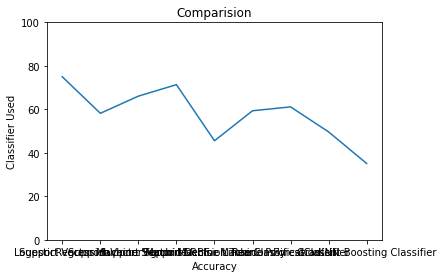

In [ ]:
import matplotlib.pylab as plot

data = dict.items()
# data = sorted(data)

x, y = zip(*data)

plot.plot(x, y)
plot.xlabel('Accuracy')
plot.ylabel('Classifier Used')
plot.title('Comparision')
plot.ylim(0,100)
plot.show()